# Name, NIM, Subject, and Class


*   Name: Javier Islamey
*   NIM: 2440016672
*   Class: LD02
*   Subject: Machine Learning Mid Exam



# 1. Objective and approach

a. Predicting the humidity based on temperature. This is suitable because there are two temperature features that can be used to predict humidity.



b. Ridge regression, because the variables involved are highly correlated.

c. The variables are , t1, t2, and hum. All of them are continuous random variables because they are obtained through measuring.



In [ ]:
print(df['t1'], df['t2'], df['hum'])

In [ ]:
# d
# Get pdf using uniform distribution
s = pd.Series(df['hum'])

# Change column to float
humArr = np.array(df['hum'].astype(float))

# Get predicted value
print("Predicted value for variable hum = ", (humArr * s).sum() / s.sum())

Predicted value for variable hum =  75.1573863005911


# 2. Linear regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Import csv using GitHub raw url
url = 'https://raw.githubusercontent.com/JavIS16/Midexam-dataset/main/london_merged.csv'
df = pd.read_csv(url)

# Convert 'cnt' column's data type from string to float
df['cnt'] = df['cnt'].astype(float)

# Slice 'cnt' column from dataframe and turn it into a 1D array
arr = np.array(df['cnt'])

# Reshape 1D array into 2D array
bike_x = np.reshape(arr, (-1,2))
bike_y = np.reshape(arr, (-1,2))

In [14]:
# Get 20% of array
twentyPercent = round(bike_x.size * 0.2)

#split data into training and testing sets, Training=80%, Test=20%
bike_x_train = bike_x[:-(twentyPercent)]
bike_x_test = bike_x[-(twentyPercent):]

#split data into training and testing sets, Training=80%, Test=20%
bike_y_train = bike_y[:-(twentyPercent)]
bike_y_test = bike_y[-(twentyPercent):]

print(f"No. of x train dataset: {bike_x_train.shape[0]}")
print(f"No. of y train dataset: {bike_y_train.shape[0]}")

print(f"No. of x test dataset: {bike_x_test.shape[0]}")
print(f"No. of y test dataset: {bike_y_test.shape[0]}")

No. of x train dataset: 5224
No. of y train dataset: 5224
No. of x test dataset: 3483
No. of y test dataset: 3483


In [15]:
# Create linear regression object
linRegr = linear_model.LinearRegression()

# Train model with training set
linRegr.fit(bike_x_train, bike_y_train)

# Predict using test set
bike_y_pred = linRegr.predict(bike_x_test)

In [ ]:
# Print coefficients
print("Coefficients: \n", linRegr.coef_)

# Print mean squared error
print("Mean squared error: %.2f" % mean_squared_error(bike_y_test, bike_y_pred))

# Print coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(bike_y_test, bike_y_pred))

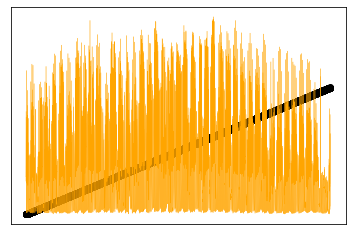

In [21]:
# Plot outputs

# Change to same size for scatter
bike_x_test = np.arange(0, len(bike_x_test), 1)
bike_y_test = np.arange(0, len(bike_y_test), 1)

plt.scatter(bike_x_test, bike_y_test, color="black")
plt.plot(bike_x_test, bike_y_pred, color="orange", linewidth=0.3)

plt.xticks(())
plt.yticks(())

plt.show()

The model performed the way it is because overfitting has happened. It performed perfectly using the training set, but horrible when used with the test set. No regularization is performed. The steps are explained through the comments in the code.





# 3. Ridge regression

In [154]:
import pandas as pd
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

In [155]:
# load cvs with github
url = 'https://raw.githubusercontent.com/JavIS16/Midexam-dataset/main/london_merged.csv'
df = pd.read_csv(url)

# X is humidity, y is bike share count
# change from string column to float array
X = np.reshape(np.array(df['hum'].astype(float)), (-1, 1))
y = np.array(df['cnt'].astype(float))

In [156]:
# split test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

In [157]:
alpha = 1

In [158]:
# Create identity matrix to be the same as size as 
n, m = X.shape
I = np.identity(m)

In [166]:
# coefficient

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + alpha * I), X.T), y)
w

array([13.88688673])

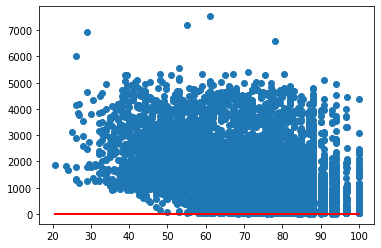

In [165]:
# with train data
ridge = Ridge(alpha=99999999999999999999999999999999999999999.0)
ridge.fit(X_train, y_train)
w = ridge.coef_[0]

X_pred = ridge.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, w*X_pred, c='red')

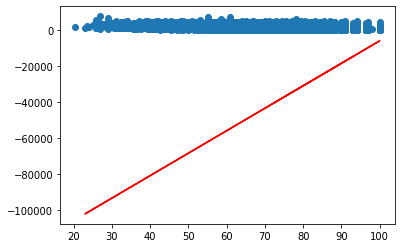

In [161]:
# with test data
ridge = Ridge(alpha=10)
ridge.fit(X_test, y_test)
w = ridge.coef_[0]
X_pred = ridge.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, w*X_pred, c='red')

This model performed horribly. Results using the test and training data are the same. The only difference is the alpha. There is no justification.

# 4. Comparison between models from no. 2 and no. 3

No. 3 used a value called lambda (alpha in python) to change the amoount of variance and bias. No. 2 does not.